In [62]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Exercise 9: Deep Learning, Dimensionality Reduction and Clustering


### Part I: Deep learning (Supervised)
#### A) 
In this question, we will classify the hardwritten MNIST data using convolutional neural network (CNN). Each observation in the data is a black and white image of size 28x28 pixels.  

Use Keras to create a convolutional neural network model. Create the model such that the feature extraction phase is composed of:

1) The first convolutional layer applies 16 different Kernels, each of size 3x3, and tanh activation.

2) The first conv layer is followed by a max pooling layer, applied to grids of 2x2

3) After the pooling layer, add a convolutional layer of depth 64 and kernel size 3x3, and tanh activation

Flatten the output of the previous layers then pass them to the prediction phase. The prediction phase is composed of a fully connected neural network of one hidden layer with 64 hidden units, and one ouput layer. The hidden layer applies Relu activation. Output layer applies Softmax function for classification of the digits

In [2]:
# Define your model here
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='tanh', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='tanh'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

The code below will train the model you defined in the previous part. In order to run the code below you need to define the model - give it  name "model".

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
938/938 [==============================] - 33s 32ms/step - loss: 0.1666 - accuracy: 0.9492
Epoch 2/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0568 - accuracy: 0.9829
Epoch 3/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0386 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0560 - accuracy: 0.9836


#### B) 
i) Describe the operation of a single neuron in a simple recurrent neural network (RNN), by writing down the equation relating  the inputs and output of one neuron (define all terms used in the equation).

ii) How is Long short-term memory (LSTM) model different from the baisc/simple RNN?

iii) Mention example application for sequence-to-sequence RNN architecture, and vector-to-sequence RNN architecture.

i) $h(t) = f(h(t - 1), x(t))$ where:
* $h(t)$ is the state of a hidden neuron at the current time step,
* $h(t - 1)$ is the state of the hidden neuron at the previous time step,
* $x(t)$ is the normal input to the hidden neuron.

ii) LSTM models are different from traditional RNN models because they learn what information to keep in the model's memory and what to discard. An LSTM model has a forget gate, which controls which part of the long-term state should be discarded; an input gate, which controls the input that should be added to the long-term state; and an output gate, hich controls the output of the current state.

iii) Sequence-to-sequence architectures can be used for translating sentences from one language to another. Vector-to-sequence architectures can be used to caption images, since the output sequence is of varying length.



### Part 2: Dimensionality reduction, PCA

Use the Wisconson breast cancer dataset and reduce the dimension of the feature space to just 2 using PCA. 
Split the data and use only the training part for the steps below. 

(a) Scale the data using StandardScaler (zero mean and unit variance variables), then find covariance matrix of the training data and  get its eignvalues and eigenvectors. 
 - Feel fee to use numpy.cov function to get covariance matrix, and numpy.linalg.eig for eigenvalue decomposition 
  
(b) Find the two principle components that corresponds to the largest absolute value of the eigenvalues. 

(c) plot the data using the principle components.

- Example snippet code below for plotting:

**%matplotlib inline**

**import matplotlib.pyplot as plt**

**plt.scatter(X_train_pca_implemented[0,:], X_train_pca_implemented[1,:], c = Y_train)**

**plt.xlabel('PC1'); 
plt.ylabel('PC2') ; 
plt.show()**

(d) If we were to use LDA instead of PCA to reduce the dimension, describe how would the steps be different? (implementation is not required)



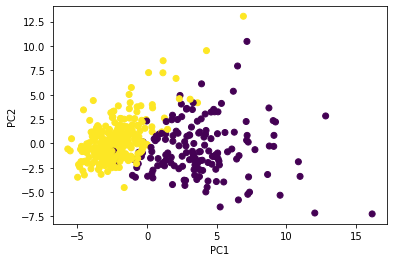

In [75]:
num_components = 2

cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_t = scaler.transform(X_train)

cov = np.cov(np.transpose(X_train_t))

lamb, v = np.linalg.eig(cov)

components = np.transpose(v[0:num_components])

pc1 = v[:, 0]
pc2 = v[:, 1]
components = np.array([pc1, pc2])

X_train_pca = np.dot(X_train_t, np.transpose(components))

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=Y_train)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Explained variance, [0.43315126 0.19586506]


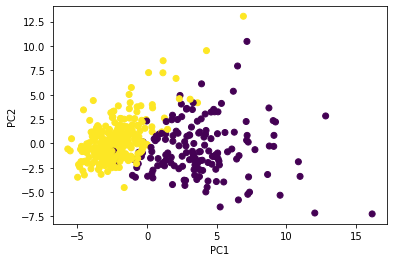

In [63]:
N_components = 2
Data_pca = PCA(n_components=N_components).fit(X_train_t)
print('Explained variance,', Data_pca.explained_variance_ratio_)

X_train_pca = Data_pca.transform(X_train_t)

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=Y_train)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Part 3: Dimentionality reduction before classification

Use dimesnionality reduction to reduce the dimension of the Wisconson breast cancer dataset, then apply supervised learning (logistic regression) using reduced feature space. Please follow the steps below:
    
 (a) Scale the data using StandardScaler (zero mean and unit variance variables), then apply PCA to the scaled training data to get two principle components. Print the shape of the training data before and after PCA is applied. 
 
 (b) Print the variance explained by each of the two principle components 
    
 (c) Use the two principle components to fit a logistic regression model with regularization parameter set to c=10. Find the accuracy. Compare it to the accuracy when all the original features (30 features) are used to fit the logistic regression model. 
 
 (d) Use LDA for dimesnionality reduction instead of PCA. Get only **one** transformed feature using the scaled training data. Transform the data to 1-D via LDA and find the accuracy of logisitc regression with similar hyperparamters as above (i.e., c=10). Comment on your results. 
 
 - It is optional to implement the LDA transformation or use the Scikit learn methods, such as the one below. 
 
**from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA**

**Sklearn_LDA = LDA(n_components=1).fit(X_train_scaled, Y_train)**

In [76]:
cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target,random_state=0)

scaler = StandardScaler().fit(X_train)
X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

N_components = 2
Data_pca = PCA(n_components=N_components).fit(X_train_t)
print('Explained variance,', Data_pca.explained_variance_ratio_)

X_train_pca = Data_pca.transform(X_train_t)
X_test_pca = Data_pca.transform(X_test_t)

print(f'Original shape of X_train: {X_train_t.shape}.')
print(f'Shape of X_train after transformation: {X_train_pca.shape}.')

Explained variance, [0.43315126 0.19586506]
Original shape of X_train: (426, 30).
Shape of X_train after transformation: (426, 2).


In [77]:
LogRegModel = LogisticRegression(C=10, solver='lbfgs', max_iter=1000)
LogRegModel.fit(X_train_t, Y_train)

print('Accuracy using original features: %.2f' % LogRegModel.score(X_test_t, Y_test))

Accuracy using original features: 0.94


In [78]:
LogRegModel = LogisticRegression(C=10, solver='lbfgs', max_iter=1000)
LogRegModel.fit(X_train_pca, Y_train)

print('Accuracy using two principal components: %.2f' % LogRegModel.score(X_test_pca, Y_test))

Accuracy using two principal components: 0.95


In [79]:
lda = LDA(n_components=1).fit(X_train_t, Y_train)

X_train_lda = lda.transform(X_train_t)
X_test_lda = lda.transform(X_test_t)

LogRegModel = LogisticRegression(C=10, solver='lbfgs', max_iter=1000)
LogRegModel.fit(X_train_lda, Y_train)

print('Accuracy using LDA dimensionality reduction: %.2f' % LogRegModel.score(X_test_lda, Y_test))

Accuracy using LDA dimensionality reduction: 0.97


**(AP)**: All of the dimensionality reduction methods have high accuracy, with PCA and LDA dimensionality reduction offering a 1% and 3% increase in accuracy, respectively. This means that both the PCA and LDA transformations were especially useful, as they offered an increase in accuracy while also decreasing the model's computational load.

### Part 4: clustering 

Assume we do not know the actual labels of the dataset used in the previous part. We will use clustering algorithms but the input will be the two derived principle components only instead of all the features.

(a) Apply K-means with random_state=0, and K=2. Use scatter plot to visualize the output of K-Means clustering algorithm. (x-axis is first principle component and y-axis is the second principle component). Also plot the actual labels. 
    
(b) Use the actual labels of Y_train to find the K-means clustering score using the adjusted_rand_score. 
    
(c) Find the adjusted_rand_score if we used agglomerative clustering setting number of clusters to 2, and default linkage (Ward). 

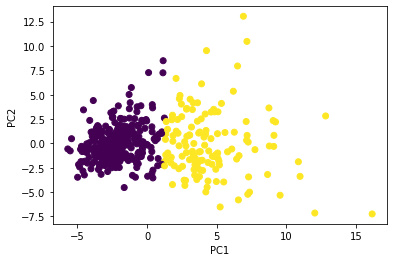

In [80]:
K = 2

kmeans = KMeans(n_clusters=K, random_state=0)

plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=kmeans.fit_predict(X_train_pca))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X_train_pca)
print('Clustering score:', adjusted_rand_score(kmeans, Y_train))

Clustering score: 0.6715634329506315


In [82]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward').fit_predict(X_train_pca)
print('Clustering score:', adjusted_rand_score(agg, Y_train))

Clustering score: 0.6179959567912103
